In [62]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
import plotly.express as px
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data

In [5]:
#Read in the csv file and convert to a Pandas dataframe
players_df = pd.read_csv("Data\Final_data.csv")


### Viewing the dataframe

In [6]:
players_df.head(3)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


## 1. Data Profiling and Data Cleaning:

In [7]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [8]:
players_df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

### Data Quality Checks

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [9]:
#the dataset is provided by Khang Huynh Nguyen Trong and Minh Nguyen Huu Tuan as co author,
#and the source of their data is transfermarkt(https://www.transfermarkt.com/),
#and we find that as an acceptable source.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [10]:
#the data covers 2 years (2021-2023) and thats the latest we found.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [11]:
#as it is the only dataset we found, we can assume that its consistent.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.



In [12]:
#the sample is appropriate and i see no value of links to player profile in database, so i will remove it.
players_df = players_df.drop("player",axis=1)


In [13]:
players_df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [14]:
#as we can see, no duplicated rows thankfully
players_df.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.


In [16]:
#Display number missing values per column
#no null values!!!
players_df.isnull().sum().sort_values(ascending=False)

team                   0
goals conceded         0
position_encoded       0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
red cards              0
name                   0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
winger                 0
dtype: int64

In [17]:
# go to clean them ---> (Haha, don't need to)

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

In [18]:
# check columns types 
players_df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [19]:
# go to clean them 
players_df['age'] = players_df["age"].map(lambda x:int(x))

In [20]:
players_df.dtypes

team                    object
name                    object
position                object
height                 float64
age                      int64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [21]:
players_df.columns

Index(['team', 'name', 'position', 'height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [31]:
# making the column names more meaningful
players_df = players_df.rename(columns={"goals":"goals per 90",
                   "assists":"assists per 90",
                   "yellow cards":"yellow cards per 90",
                   "second yellow cards":"second yellow cards per 90",
                   "red cards":"red cards per 90",
                   "goals conceded":"goals conceded per 90",
                   "clean sheets":"clean sheets per 90"})

In [52]:
# making new columns with more meaningful information (ex: goals as an int rather than 0.42)
players_df["goals"] = players_df["goals per 90"] * players_df["minutes played"]/90
players_df["goals"] = players_df["goals"].map(lambda x:round(x))

players_df["assists"] = players_df["assists per 90"] * players_df["minutes played"]/90
players_df["assists"] = players_df["assists"].map(lambda x:round(x))

players_df["yellow cards"] = players_df["yellow cards per 90"] * players_df["minutes played"]/90
players_df["yellow cards"] = players_df["yellow cards"].map(lambda x:round(x))

players_df["second yellow cards"] = players_df["second yellow cards per 90"]*players_df["minutes played"]/90
players_df["second yellow cards"] = players_df["second yellow cards"].map(lambda x:round(x))

players_df["red cards"] = players_df["red cards per 90"] * players_df["minutes played"]/90
players_df["red cards"] = players_df["red cards"].map(lambda x:round(x))

players_df["goals conceded"] = players_df["goals conceded per 90"] * players_df["minutes played"]/90
players_df["goals conceded"] = players_df["goals conceded"].map(lambda x:round(x))

players_df["clean sheets"] = players_df["clean sheets per 90"] * players_df["minutes played"]/90
players_df["clean sheets"] = players_df["clean sheets"].map(lambda x:round(x))

In [53]:
players_df.head()

,team,name,position,height,age,appearance,goals per 90,assists per 90,yellow cards per 90,second yellow cards per 90,...,highest_value,position_encoded,winger,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets
0,Manchester United,David de Gea,Goalkeeper,189.0,32,104,0.000000,0.000000,0.009585,0.0,...,70000000,1,0,0,0,1,0,0,127,35
1,Manchester United,Jack Butland,Goalkeeper,196.0,30,15,0.000000,0.000000,0.069018,0.0,...,22000000,1,0,0,0,1,0,0,18,3
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37,4,0.000000,0.000000,0.000000,0.0,...,6000000,1,0,0,0,0,0,0,2,3
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25,82,0.028090,0.056180,0.224719,0.0,...,50000000,2,0,2,4,16,0,0,0,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30,63,0.017889,0.017889,0.053667,0.0,...,80000000,2,0,1,1,3,0,0,0,0


In [58]:
grouped_df = players_df.groupby("position_encoded")

,team,name,position,height,age,appearance,goals per 90,assists per 90,yellow cards per 90,second yellow cards per 90,...,highest_value,position_encoded,winger,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets
0,Manchester United,David de Gea,Goalkeeper,189.000000,32,104,0.0,0.0,0.009585,0.0,...,70000000,1,0,0,0,1,0,0,127,35
1,Manchester United,Jack Butland,Goalkeeper,196.000000,30,15,0.0,0.0,0.069018,0.0,...,22000000,1,0,0,0,1,0,0,18,3
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37,4,0.0,0.0,0.000000,0.0,...,6000000,1,0,0,0,0,0,0,2,3
32,West Ham United,Alphonse Areola,Goalkeeper,195.000000,30,41,0.0,0.0,0.000000,0.0,...,17500000,1,0,0,0,0,0,0,36,18
33,West Ham United,Lukasz Fabianski,Goalkeeper,190.000000,38,75,0.0,0.0,0.040767,0.0,...,9000000,1,0,0,0,3,0,0,98,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10698,Adelaide United,James Delianov,Goalkeeper,188.000000,23,6,0.0,0.0,0.000000,0.0,...,350000,1,0,0,0,0,0,0,6,2
10699,Adelaide United,Ethan Cox,Goalkeeper,181.240353,19,0,0.0,0.0,0.000000,0.0,...,50000,1,0,0,0,0,0,0,0,0
10700,Adelaide United,Steven Hall,Goalkeeper,187.000000,18,3,0.0,0.0,0.000000,0.0,...,50000,1,0,0,0,0,0,0,4,1
10727,Western Sydney Wanderers,Lawrence Thomas,Goalkeeper,191.000000,31,51,0.0,0.0,0.019608,0.0,...,1000000,1,0,0,0,1,0,0,73,13


C:\Users\USER\AppData\Local\Temp\ipykernel_11796\676535233.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




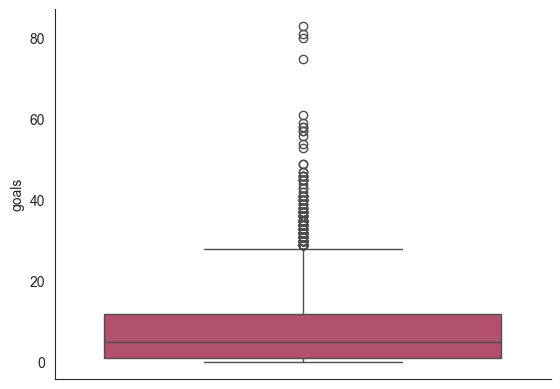

In [60]:
# check for outliers
sns.set_style('white')
sns.boxplot(data=grouped_df.get_group(4)["goals"], palette='flare')
sns.despine()
plt.show()

## 3. Univariate Analysis: 

### 1. Univariate Graphical Analysis:

#### I. Categorical Variables:

In [78]:
#seeing which position our data is focused on (mostly defenders)
fig = px.bar(players_df, x='position')
fig.show()

#### II. Numerical Variables:

In [68]:
#seeing the age ranges of players (suprisingly most of them are between 20-30)
fig = px.histogram(players_df, x='age')
fig.show()

In [79]:
#how many goals forwards scored in the 2 years (most of them didnt score anything for 2 years)
fig = px.histogram(grouped_df.get_group(4), x='goals')
fig.show()

### Save the DataFrame

In [82]:
# saved for later uses in models
players_df.to_csv("Data\Final_data2.csv")